In [1]:
from minde.libs.distribution_generator import EvolutionTask

dim_x = 10
dim_y = 10
mean = [0 for _ in range(dim_x*dim_y)]
cov = [[1 if i == j else 0 for i in range(dim_x*dim_y)] for j in range(dim_x*dim_y)]

In [2]:
dim_x = dim_y = 15
pops = (dim_x*dim_y)**2
pops = 10000
mu = pops//5
print("Population size: ", pops)
print("Mu: ", mu)

task = EvolutionTask(1.0, dim_x=dim_x, dim_y=dim_y, mu=mu, population_size=pops, scale=1.0, strategy="comma")
task.train(n_generations=300, temperature=0.5)

dist = task.best_agent.distribution
print("Mutual information of best distribution: ", task.mutual_information(dist))

Population size:  10000
Mu:  2000


Best fitness: -0.3429214972933214:  63%|██████▎   | 188/300 [04:32<01:50,  1.01it/s] 

In [3]:
import numpy as np

np.save(r"/home/foresti/minde/discrete_distributions/best_distribution_dim15_mutinfo01.npy", dist)

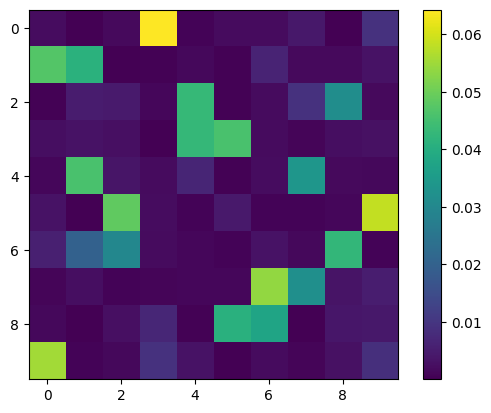

In [4]:
from matplotlib import pyplot as plt
plt.imshow(dist)
# put a scale on the side
plt.colorbar()

In [2]:
# Download MNIST and choose dim_x*dim_y random images using pytorch
import torch
from torchvision import datasets, transforms

dim_x = dim_y = 15

transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(r"/home/foresti/minde/data", train=True, download=True, transform=transform)
mnist_loader = torch.utils.data.DataLoader(mnist, batch_size=1, shuffle=True)

images = []
for i, (image, label) in enumerate(mnist_loader):
    images.append(image[0].numpy())
    if i == dim_x*dim_y-1:
        break

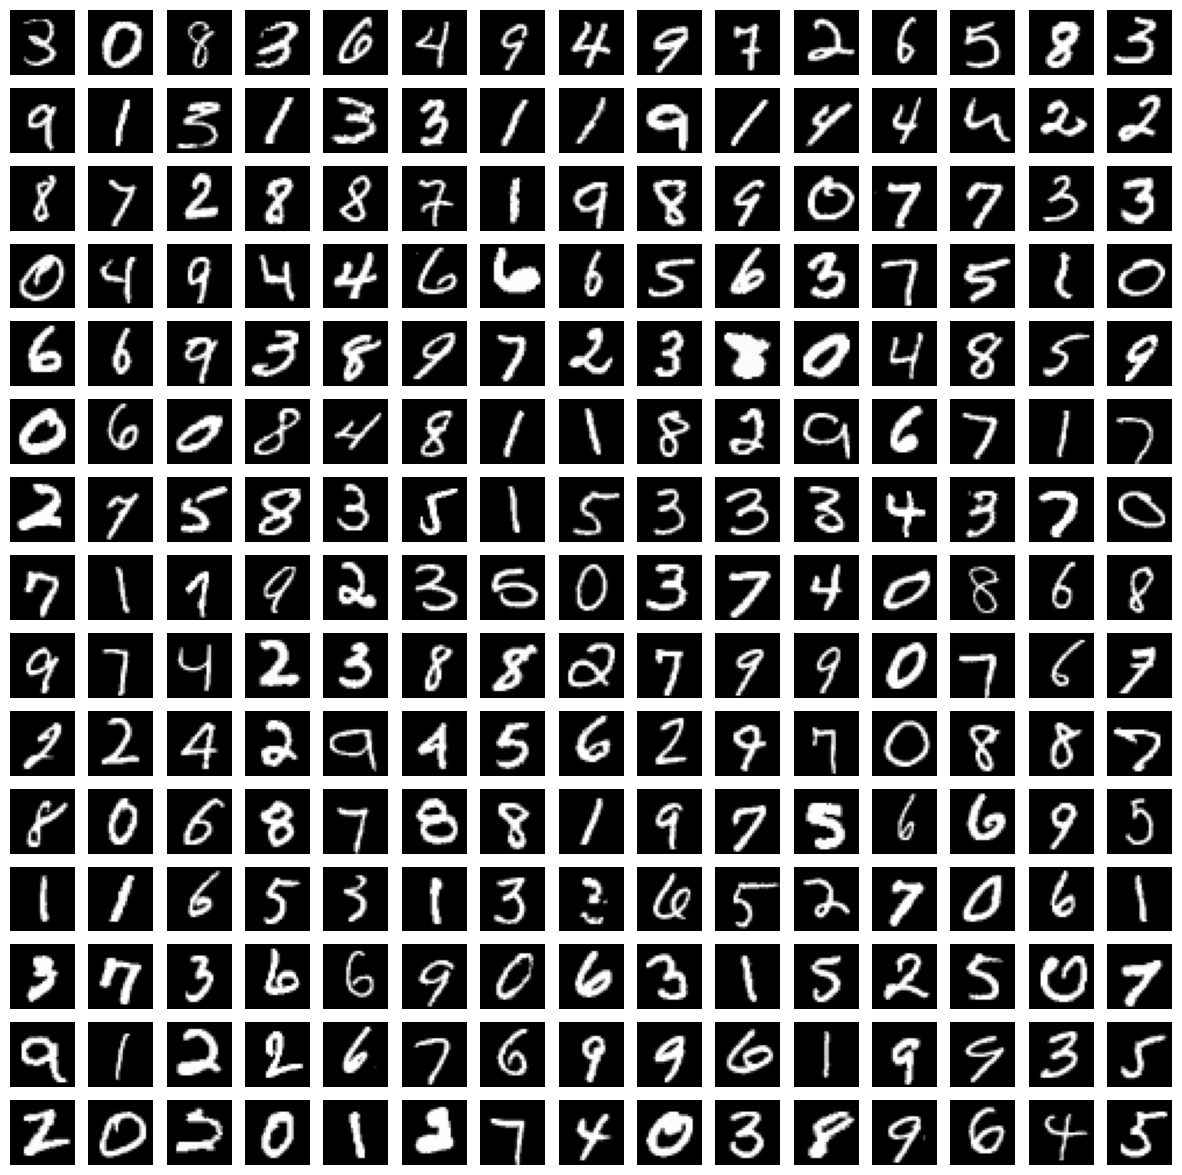

In [6]:
# Display the images
from matplotlib import pyplot as plt


fig, axs = plt.subplots(dim_x, dim_y, figsize=(dim_x, dim_y))
for i in range(dim_x):
    for j in range(dim_y):
        axs[i, j].imshow(images[i*dim_y+j][0], cmap='gray')
        axs[i, j].axis('off')
plt.show()

In [9]:
img = images[0].reshape(-1,1)
print(img.shape)

(784, 1)


In [5]:
import json
import pandas as pd

# Path to the JSON file
file_path = r'/home/foresti/minde/results_j/results_continuous_mutinfo.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

mi_data = []
mi_sigma_data = []

for k, v in data.items():
    mi_data.append([k, v['gt'], v['minde_estimate']['mi']])
    mi_sigma_data.append([k, v['gt'], v['minde_estimate']['mi_sigma']])

# Create DataFrames
mi_df = pd.DataFrame(mi_data, columns=['Distribution', 'Ground Truth', 'MI Estimate'])
mi_sigma_df = pd.DataFrame(mi_sigma_data, columns=['Distribution', 'Ground Truth', 'MI Sigma Estimate'])

# Convert DataFrames to LaTeX tables
mi_latex = mi_df.to_latex(index=False)
mi_sigma_latex = mi_sigma_df.to_latex(index=False)

# Print LaTeX tables
print("MI Estimate Table:")
print(mi_latex)
print("\nMI Sigma Estimate Table:")
print(mi_sigma_latex)

MI Estimate Table:
\begin{tabular}{lrr}
\toprule
    Distribution &  Ground Truth &  MI Estimate \\
\midrule
 uniform\_1\_1\_0.0 &           0.0 &     0.001658 \\
   expon\_1\_1\_0.0 &           0.0 &     0.001793 \\
    norm\_1\_1\_0.0 &           0.0 &     0.001024 \\
       t\_1\_1\_0.0 &           0.0 &     0.009576 \\
 uniform\_1\_1\_1.0 &           1.0 &     0.992911 \\
   expon\_1\_1\_1.0 &           1.0 &     0.978366 \\
    norm\_1\_1\_1.0 &           1.0 &     0.990995 \\
       t\_1\_1\_1.0 &           1.0 &     6.196179 \\
 uniform\_1\_1\_2.0 &           2.0 &     1.942598 \\
   expon\_1\_1\_2.0 &           2.0 &     1.937983 \\
    norm\_1\_1\_2.0 &           2.0 &     1.921648 \\
       t\_1\_1\_2.0 &           2.0 &    13.742141 \\
 uniform\_1\_1\_3.0 &           3.0 &     2.925556 \\
   expon\_1\_1\_3.0 &           3.0 &     2.950527 \\
    norm\_1\_1\_3.0 &           3.0 &     2.917125 \\
       t\_1\_1\_3.0 &           3.0 &    27.183341 \\
 uniform\_1\_1\_4.0 &      

/tmp/ipykernel_1644683/648330654.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mi_latex = mi_df.to_latex(index=False)
/tmp/ipykernel_1644683/648330654.py:24: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mi_sigma_latex = mi_sigma_df.to_latex(index=False)


In [6]:
mi_df.to_latex('/home/foresti/minde/results_j/mi_estimate_table.tex', index=False)
mi_sigma_df.to_latex('/home/foresti/minde/results_j/mi_sigma_estimate_table.tex', index=False)

/tmp/ipykernel_1644683/1422727371.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mi_df.to_latex('/home/foresti/minde/results_j/mi_estimate_table.tex', index=False)
/tmp/ipykernel_1644683/1422727371.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mi_sigma_df.to_latex('/home/foresti/minde/results_j/mi_sigma_estimate_table.tex', index=False)


In [ ]:
arc hyperbolic sine function
ksg estimator performance
test dimensionality of the distribution